<div style="
    background: linear-gradient(90deg, #c8102e 0%, #002868 100%);
    color: white;
    padding: 18px 22px;
    border-left: 6px solid #002868;
    border-right: 6px solid #c8102e;
    border-top: 3px solid #002868;
    border-bottom: 3px solid #002868;
    border-radius: 8px;
    box-shadow: 0 2px 8px rgba(0,0,0,0.18);
    font-family: 'Segoe UI', -apple-system, BlinkMacSystemFont, sans-serif;
">

  <h1 style="
      margin: 0 0 6px 0;
      font-size: 30px;
      font-weight: 700;
      letter-spacing: 0.03em;
      text-transform: uppercase;
      color: white;
  ">
    Haiti Food Price Analysis
  </h1>

  <p style="
      margin: 0;
      font-size: 15px;
      opacity: 0.95;
  ">
    Exploring regional inequality, currency pressure, and structural fragility across Haiti’s food market economy.
  </p>

</div>


<br></br>

<br></br>

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
# Load dataset
file_id = "1VyLHX20ofimGB7jhFhhw06MBu9Ajod4o"
url = f"https://drive.google.com/uc?download&id={file_id}"
haiti_df = pd.read_csv(url)
print(haiti_df.head())

         date  Department      City    market  latitude  longitude  \
0  2005-01-15  Artibonite  Gonaives  Gonaives     19.45 -72.683333   
1  2005-01-15  Artibonite  Gonaives  Gonaives     19.45 -72.683333   
2  2005-01-15  Artibonite  Gonaives  Gonaives     19.45 -72.683333   
3  2005-01-15      Centre    Hinche    Hinche     19.15 -72.016667   
4  2005-01-15      Centre    Hinche    Hinche     19.15 -72.016667   

            food_type               commodity     unit  usdprice  
0  cereals and tubers      Maize meal (local)  Marmite    0.4554  
1  cereals and tubers           Rice (tchako)  Marmite    0.7135  
2  cereals and tubers  Wheat flour (imported)  Marmite    0.4554  
3  cereals and tubers   Maize meal (imported)    Pound    0.0999  
4  cereals and tubers      Maize meal (local)  Marmite    0.2733  


In [184]:
# Show missing values
missing_values = haiti_df.isnull().sum()
print('The columns with missing values:\n', missing_values)

The columns with missing values:
 date          0
Department    0
City          0
market        0
latitude      0
longitude     0
food_type     0
commodity     0
unit          0
usdprice      0
dtype: int64


In [185]:
# In case of existing duplicates
haiti_df.drop_duplicates(inplace=True)

In [186]:
# Print data types
print(haiti_df.dtypes)

date           object
Department     object
City           object
market         object
latitude      float64
longitude     float64
food_type      object
commodity      object
unit           object
usdprice      float64
dtype: object


In [187]:
# Convert date column to datetime
haiti_df['date'] = pd.to_datetime(haiti_df['date'])

In [188]:
# Show data types
print(haiti_df.dtypes)

date          datetime64[ns]
Department            object
City                  object
market                object
latitude             float64
longitude            float64
food_type             object
commodity             object
unit                  object
usdprice             float64
dtype: object




---



# **Exploratory Analysis**

In [189]:
# Glimpse on food prices statistics
haiti_df['usdprice'].describe().round(3)

,usdprice
count,14923.000
mean,2.595
std,2.591
min,0.058
25%,0.577
50%,1.784
75%,3.675
max,21.072


This summary of the price distribution tells a clear story about Haiti's food market dynamics:

* **Mean = 2.60, Median = 1.78:** The mean is noticeably higher than the median, which signals a right‑skewed distribution. Some very expensive commodities are pulling the average upward.

* **Standard deviation ≈ 2.59:** Prices in Haiti vary widely. That's a strong signal of inequality between cheap local staples and costly imports.

* **Range (0.06- 21.07):** Points to an enormous spread that highlights once again the gap between local goods and imported items.

### Histogram: Raw Price Distribution

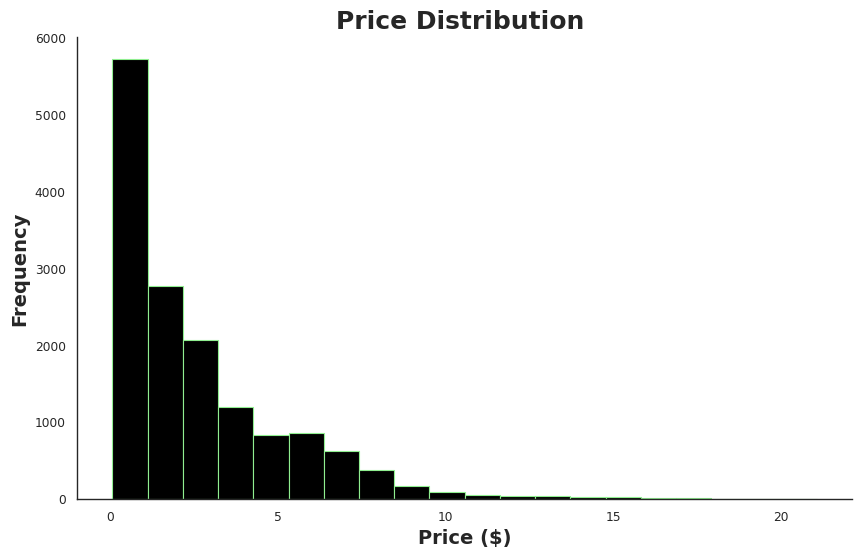

In [190]:
# Raw price histogram
plt.figure(figsize=(10, 6))
plt.hist(haiti_df['usdprice'], bins=20, color='black', edgecolor='lightgreen')
plt.xlabel('Price ($)', weight='bold', fontsize=14)
plt.ylabel('Frequency', fontsize=14, weight='bold')
plt.title('Price Distribution ', weight='bold', fontsize=18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

This histogram reveals a clear right-skewed pattern in Haiti's food price.
Obviously, this **reflects economic inequality and market segmentation: basic staples are widely available and affordable, but imported items are out of reach for many, suggesting strong limited purchasing power.**

####Exchange rate effect?
Because Haitians buy in gourdes but the dataset is converted to USD, local staples appear extremely cheap while imported goods remain expensive. Haiti’s chronic currency depreciation amplifies this gap, making the right‑skew more dramatic in USD terms than it would look in gourdes.

**Log transformation Implementation will:**
* Reduce skew and reveals a clearer price structure.
* Make the distribution more balanced and easier to interpret.

### Histogram: Logged-price Distribution

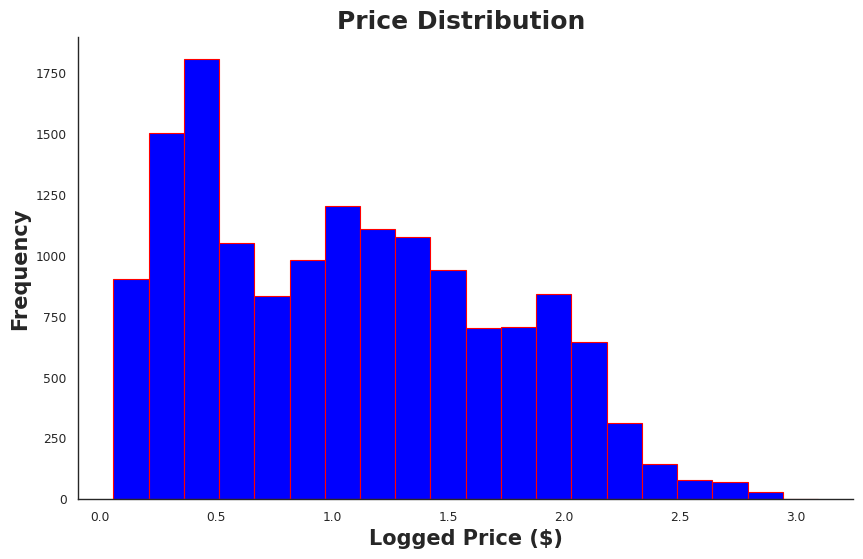

In [191]:
# Plot logged price histogram
plt.figure(figsize=(10, 6))
plt.hist(np.log1p(haiti_df['usdprice']), bins=20, color='blue', edgecolor='red')
plt.xlabel('Logged Price ($)', weight='bold', fontsize=15)
plt.ylabel('Frequency', weight='bold', fontsize=15)
plt.title('Price Distribution ', weight='bold',fontsize=18)
# Remove top and right spines on plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Despite remaining right skewed, it's much less extreme. The peak is now shifted slightly, and the tail is shorter, which means the data is less dominated by extreme values. Since the scale is now more uniform, it will easier to make comparisons between commodities or regions.


<br></br>

### **Food Measurement Systems: Haiti in Context**


In Haiti, food measurement systems rely heavily on traditional and informal units such as "marmite", "gode", "ti mammit", "boutey", and "sak", which are mostly volume‑based and vary by region or vendor. These units dominate street markets and informal trade, but they lack standardization, making packaging compatibility and pricing transparency extremely limited.

By contrast, the United States uses standardized weight and volume units like pounds, ounces, gallons, cups, and tablespoons, which are regulated by agencies such as the *USDA* and *FDA*. This system supports consistent packaging, clear price labeling, and easy integration with global trade, while Haiti’s reliance on traditional units complicates regulation, automation, and international alignment.
<br></br>
##### Source:
https://timothyschwartzhaiti.com/study-of-market-measuring-system-in-haiti/


<br></br>
##### Haiti's Food Measurements Description:
* Marmite: A traditional Haitian volume unit, roughly equivalent to 1.5–2 liters, often used for grains like rice or maize. It's culturally embedded and widely used in markets.

* Pound: Standard weight unit (≈ 0.45 kg), used for imported or packaged goods.

* Gallon: Liquid volume unit (≈ 3.78 liters), typically used for oil or beverages.

* 350 G: Metric weight unit (≈ 0.77 pounds), likely used for small packaged items like sugar or flour.

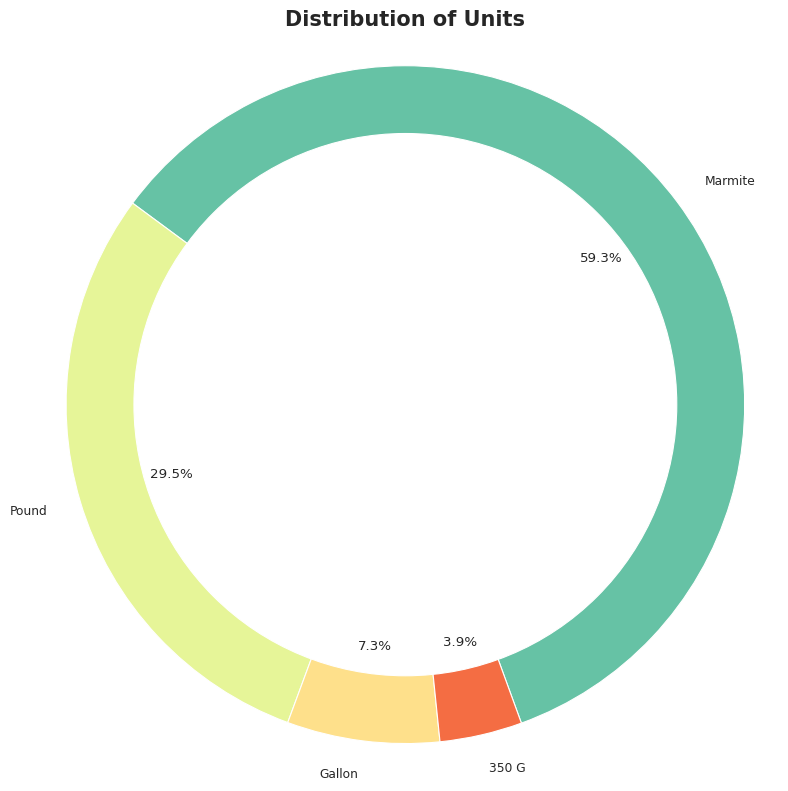

In [192]:
# TOtal count per unit
unit_count = haiti_df['unit'].value_counts()

# Plot with inner circle
plt.figure(figsize=(8, 8))
plt.pie(unit_count, labels= unit_count.index, autopct='%1.1f%%', startangle=290, pctdistance=0.72, colors= sns.color_palette('Spectral_r', len(unit_count)))
centre_circle= plt.Circle((0,0), radius=0.8, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Distribution of Units', weight='bold', fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()


### Data shows:
* The dominance of "Marmite", highlighting Haiti's reliance on traditional volume, while the presence of "Pound" and "Gallon" units reflects the influence of imported goods and liquid commodities.
* The low frequency of "350 G" points that reflects limited packaging standardization in Haiti's local markets.

<br></br>

### **Price Distribution vs Price Magnitude for Food Groups**

/tmp/ipython-input-2548248023.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='food_type', y='usdprice', palette='Blues', fliersize=8, width=0.8, data=haiti_df)


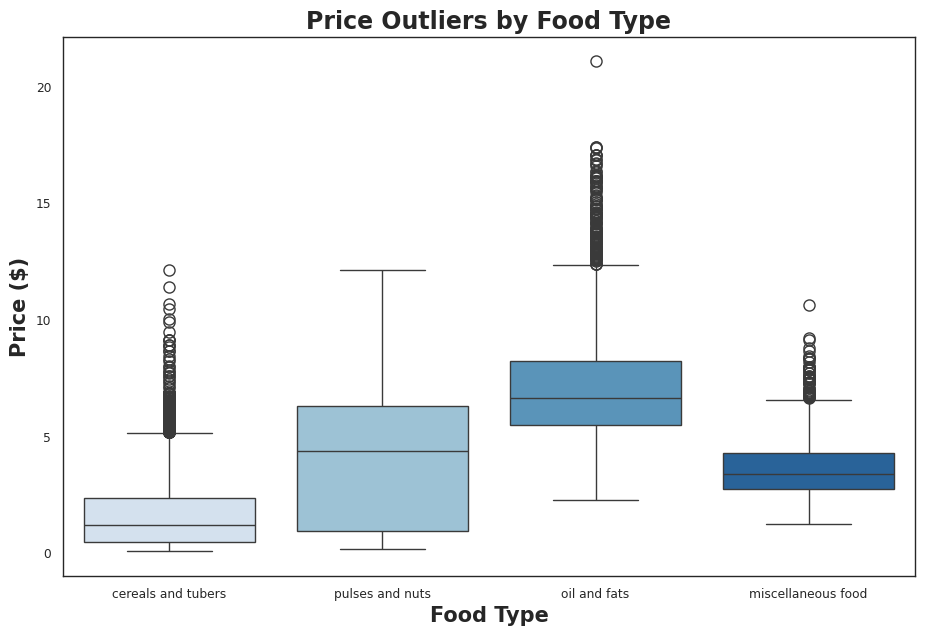

In [193]:
# Create boxplot for Price Vs Food Type
plt.figure(figsize=(11,7))
sns.boxplot(x='food_type', y='usdprice', palette='Blues', fliersize=8, width=0.8, data=haiti_df)
plt.title('Price Outliers by Food Type', weight='bold',fontsize=17)
plt.xlabel('Food Type', weight='bold',fontsize=15)
plt.ylabel('Price ($)',weight='bold', fontsize=15)
plt.xticks(rotation=0)
plt.show()

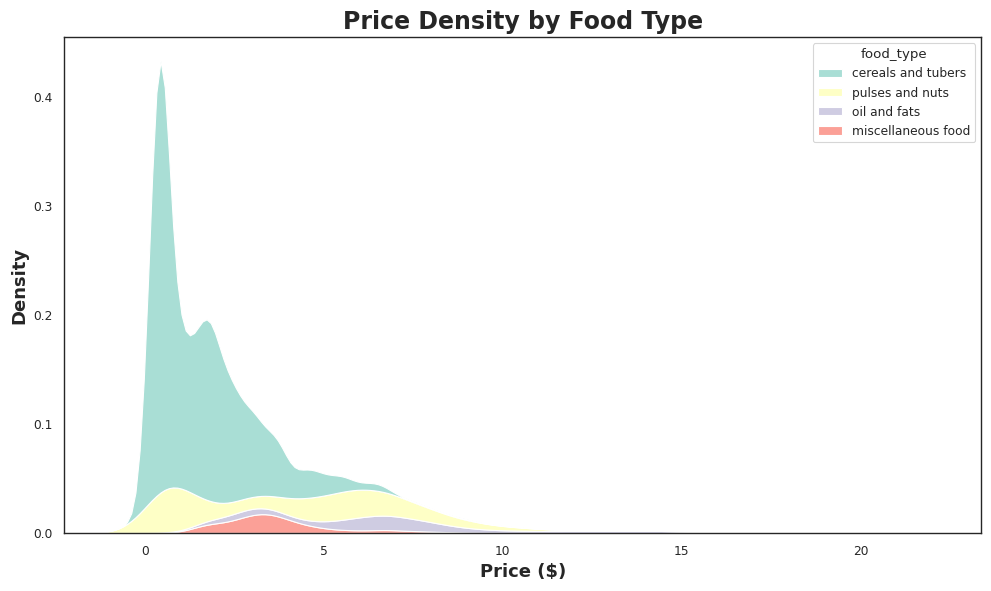

In [194]:
# Create kdeplot with price
plt.figure(figsize=(10,6))
sns.kdeplot(data=haiti_df, x='usdprice', hue='food_type', multiple='stack')
plt.title('Price Density by Food Type', weight='bold', fontsize=17)
plt.xlabel('Price ($)', weight='bold',fontsize=13)
plt.ylabel('Density', weight='bold', fontsize=13)
plt.tight_layout()
plt.show()

#### Comment:
* The Boxplot showed that oil and fats have a high median price, a wide interquartile range, and the most extreme outliers (some prices are above 20 dollars). This suggests that oil and fats are relatively scarce in Haiti's food economy, which contributes to their high prices and volatility.

* The KDE plot shows how frequently prices occur across the dataset. Cereals and tubers have a tall peak at low prices. This means they're very common and consistently cheap in Haiti. **This aligns with local consumption patterns, where rice is eaten widely and frequently, reinforcing its prominence in the food economy.**

#### **Fun Fact!!!**
Rice is loved in Haiti not just because it's cheap and filling, but because it's a cultural anchor, a symbol of resilience, and a daily ritual that unites families and communities; [A Grain of Unity](https://www.caribbeangreenliving.com/more-than-just-a-grain-exploring-the-shared-love-for-rice-in-haitian-culture/) if you will.

<br></br>

### **Detecting Price Outliers**

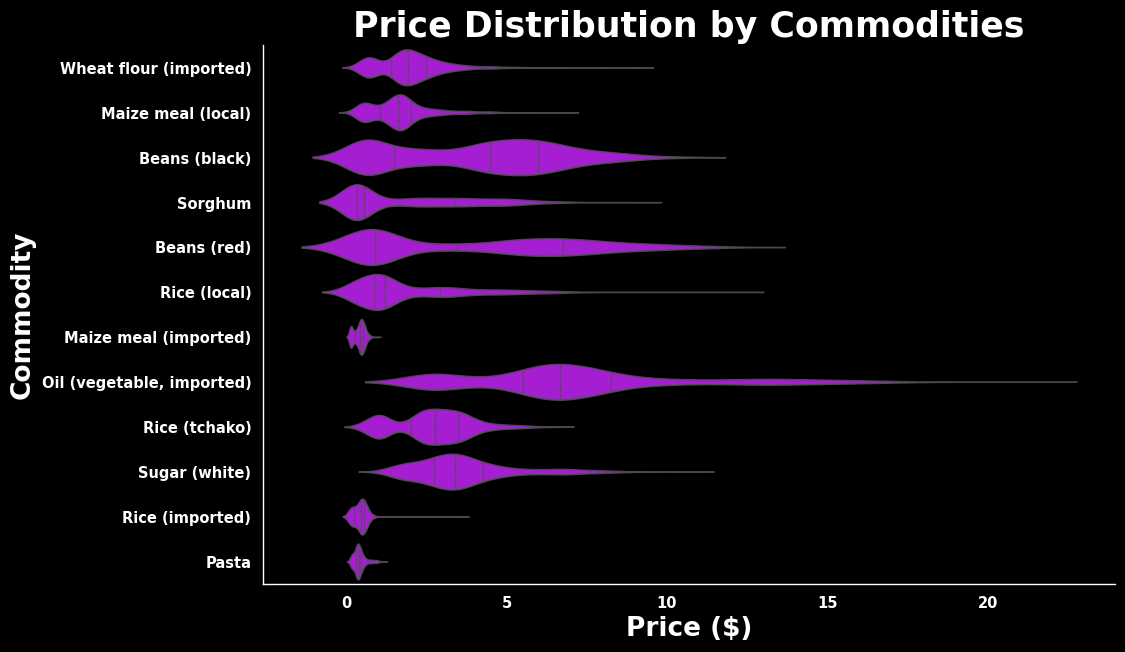

In [195]:
# Get commodities for Haiti
commodity_ordered= haiti_df['commodity'].value_counts().index.tolist()

# Create violin plot
plt.style.use('dark_background')
sns.set_context('paper')
plt.figure(figsize=(11,7))
sns.violinplot(y='commodity', x='usdprice', data=haiti_df,
               order=commodity_ordered, inner='quartile', density_norm='width', color='#BF00FF',  alpha=0.95)
plt.title('Price Distribution by Commodities', color='white', fontsize=25, fontweight='bold')
plt.xlabel('Price ($)',weight='bold', fontsize=19)
plt.ylabel('Commodity', weight='bold',fontsize=19)
plt.yticks(rotation=0, weight='bold', fontsize=10.5)
plt.xticks(weight='bold', fontsize=10.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
plt.show()

#### Comment:
1. Price volatility in imported commodities like wheat flour (imported) and oil (vegetable, imported) shows wide distributions, signaling **inconsistent pricing**. This tells us they're especially sensitive to phenomena like inflation, shipping costs, currency devaluation, or supply issues.

2. Tighter clustering for local commodities Maize meal (local) and rice (tchako) display narrower violins, which is a sign of **price consistency**. This might be explained by tighter regulation in localized markets by the government.

3. Right-skewed distribution is indicative of high inequality or sudden inflation spikes in certain regions.

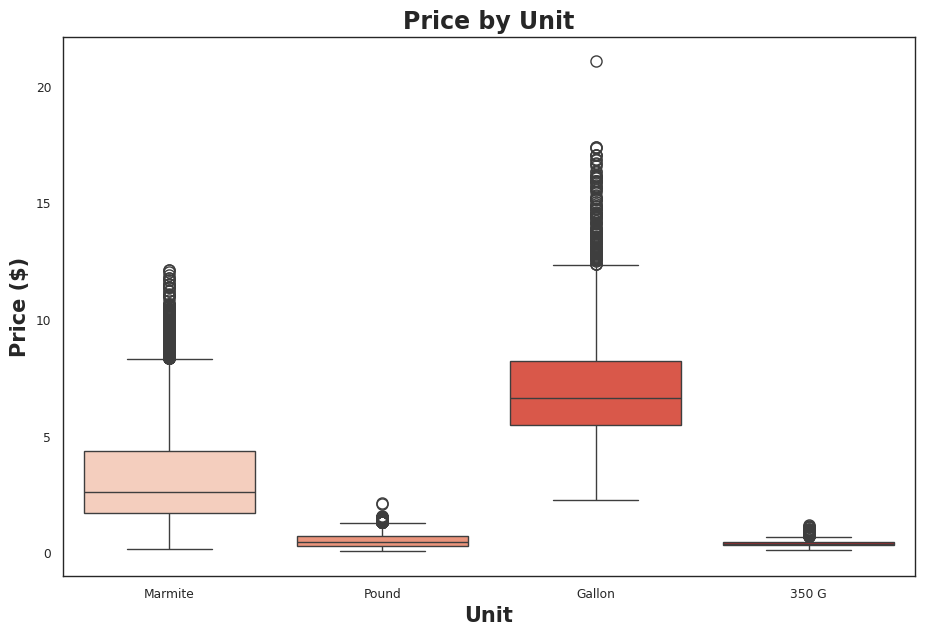

In [196]:
# Create boxplot for Price Vs Unit
sns.set_style('white')
sns.set_context('paper')
plt.figure(figsize=(11,7))
sns.boxplot(x='unit', y='usdprice', hue='unit', legend=False, palette='Reds', fliersize=8, width=0.8, data=haiti_df)
plt.title('Price by Unit', weight='bold',fontsize=17)
plt.xlabel('Unit', weight='bold',fontsize=15)
plt.ylabel('Price ($)', weight='bold',fontsize=15)
plt.show()

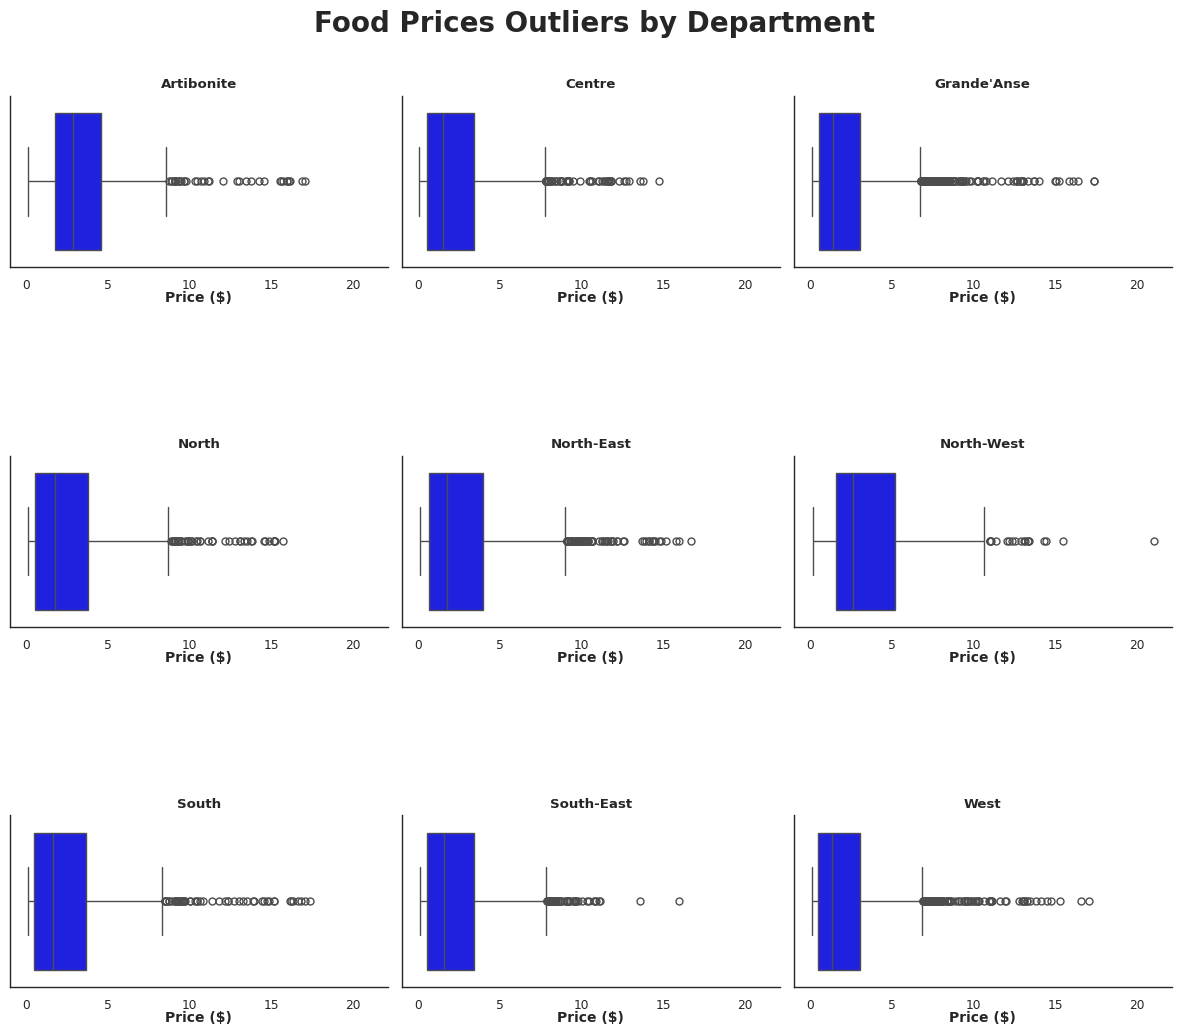

In [197]:
# Create a catplot for Price per departments
sns.set_style('white')
sns.set_context('paper')
cat = sns.catplot(data=haiti_df, x='usdprice', col='Department', kind='box', showfliers=True, color='blue',col_wrap=3, height=3.6, aspect=1.1)
cat.set_titles("{col_name}", fontsize= 13, weight='bold')
cat.fig.suptitle('Food Prices Outliers by Department', fontweight= 'bold',fontsize=20)
cat.fig.subplots_adjust(top=0.90, hspace=1.1, bottom=0.075)

# To show Price ($) on each row
for ax in cat.axes.flatten():
    ax.set_xlabel('') # this is to remove the 'usdprice' as default
    ax.text(0.5, -0.2, "Price ($)", transform=ax.transAxes,
            ha='center', fontsize=10, weight='bold') # To include Price($) text
    ax.tick_params(axis='x', labelbottom=True) # For showing Price($) in every row

<br></br>

### **Commodity Consumption and Pricing in Haiti**

/tmp/ipython-input-1677524980.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_prices, palette=col, edgecolor='white')


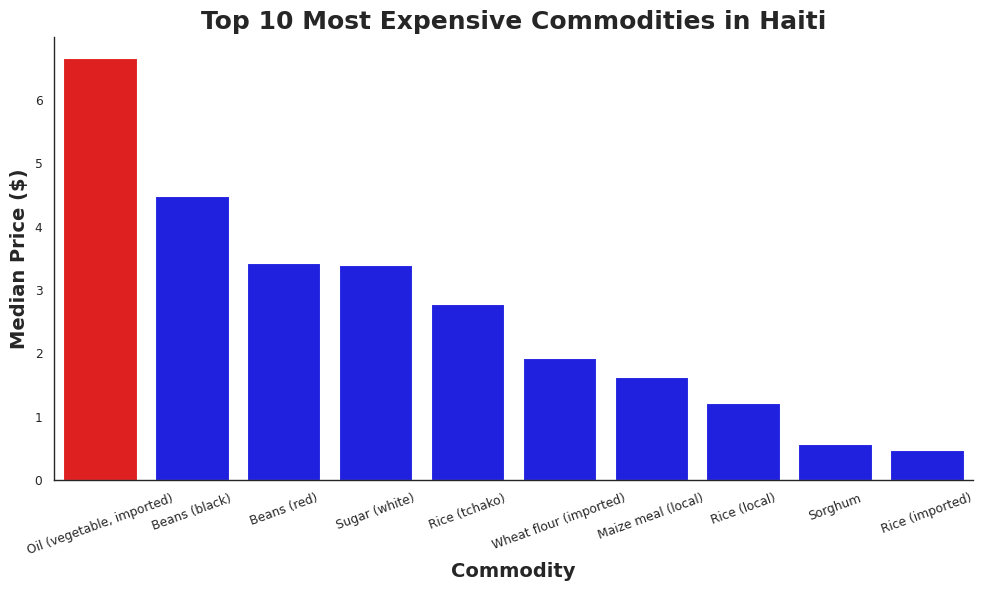

In [198]:
# Top 10 median price by commodities
median_prices = haiti_df.groupby('commodity')['usdprice'].median().sort_values(ascending=False).head(10)

# Create color palette
col = ['red' if i=='Oil (vegetable, imported)' else 'blue' for i in median_prices.index]

# Plot top 10 commodities median price
sns.set_style('white')
sns.set_context('paper')
plt.figure(figsize=(10,6))
sns.barplot(data=median_prices, palette=col, edgecolor='white')
plt.xlabel('Commodity', weight='bold',fontsize=14)
plt.ylabel('Median Price ($)', weight='bold', fontsize=14)
plt.title('Top 10 Most Expensive Commodities in Haiti', weight='bold',fontsize=18)
plt.xticks(rotation=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

#### Comment:

* The median price leader, *Oil (vegetables, imported)*, suggests that processed imports carry the highest financial burden. This aligns well with Haiti's dependency on imports, its vulnerability to global inflationary shocks, and exchange rate pressures.

* It is not surprising that beans and sugar (both consumed regularly) have elevated costs. It will likely impact low-income Haitians the hardest, especially in regions with limited agricultural productivity or limited market access.

/tmp/ipython-input-2031589721.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data=top_frequent_commodities, x='frequency', y='commodity', palette='viridis_r', edgecolor='lightblue')


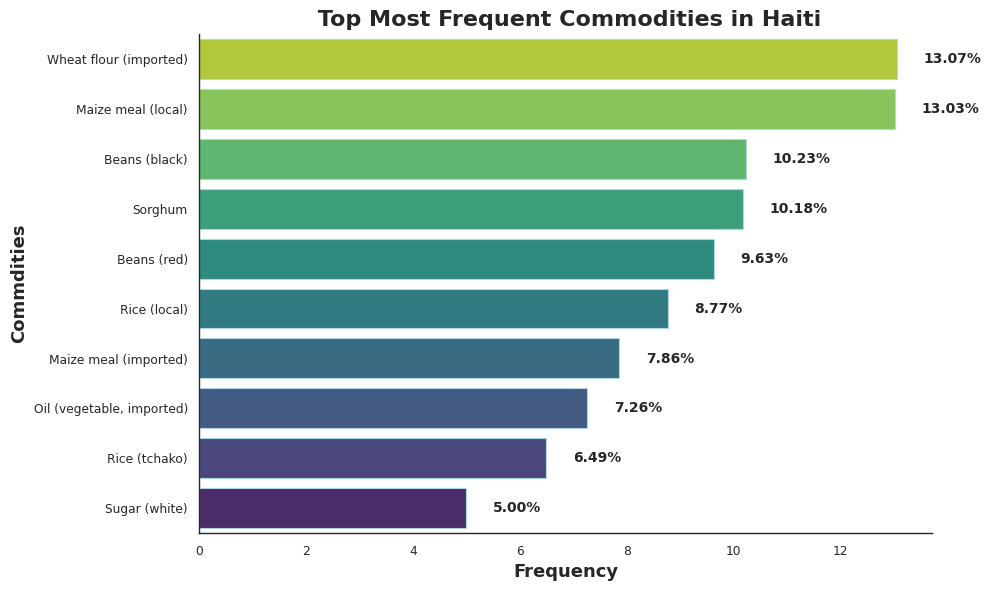

In [199]:
# Top 10 commodities frequency
top_frequent_commodities= haiti_df['commodity'].value_counts(normalize=True)*100
top_frequent_commodities= top_frequent_commodities.head(10).reset_index()
top_frequent_commodities.columns = ['commodity', 'frequency']

# Color palette
colors = ['lightgreen' if x=='Wheat flour (imported)' else 'lightgreen' if x=='Maize meal (local)' else 'grey' for x in top_frequent_commodities.index]

# Plot top common goods
sns.set_style('white')
sns.set_context('paper')
plt.figure(figsize=(10,6))
ax= sns.barplot(data=top_frequent_commodities, x='frequency', y='commodity', palette='viridis_r', edgecolor='lightblue')
for index, row in top_frequent_commodities.iterrows():
  ax.text(row['frequency'] + 0.5, index, f"{row['frequency']:.2f}%", va='center', weight='bold', fontsize=10)
plt.xlabel('Frequency', weight='bold', fontsize=13)
plt.ylabel('Commdities', weight='bold', fontsize=13)
plt.title(' Top Most Frequent Commodities in Haiti', weight='bold', fontsize=16)
plt.yticks(rotation=0)
plt.tight_layout()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


#### Comment:
This plot reflects how frequently each commodity appears in the dataset in %. In this case, *wheat flour(imported)* and *Maize meal (local)* rank highest, suggesting they're more consistently available across regions and widely consumed or traded. Their frequent reporting plays a crucial role in tracking inflationary patterns, making them key indicators in Haiti's food economy.

<br></br>

### **Comparative Analysis of Median Prices Across Departments**

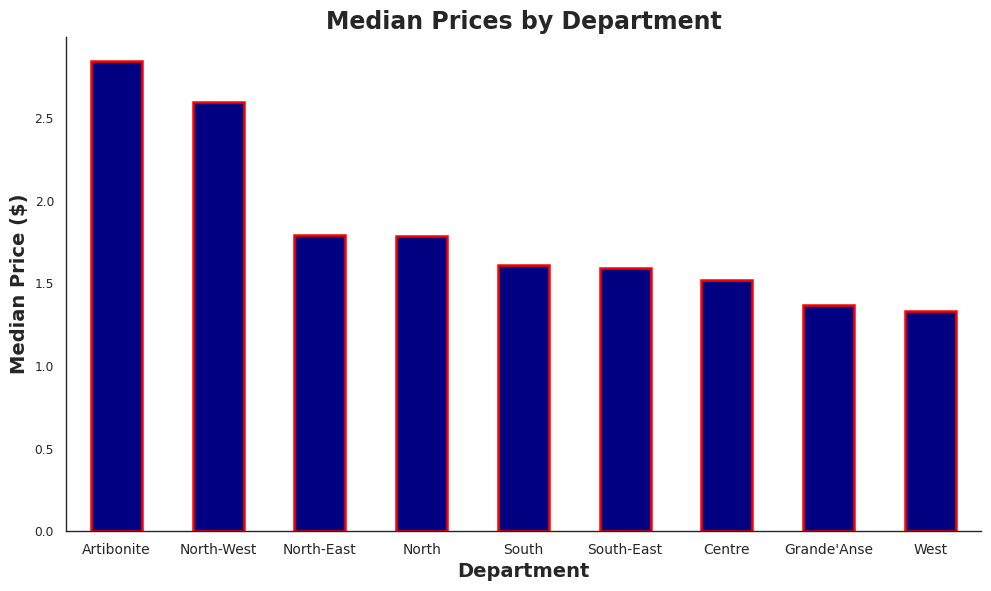

In [200]:
# Median price by Department
dept_prices = haiti_df.groupby('Department')['usdprice'].median().sort_values(ascending=False)

# Barplot
dept_prices.plot(kind='bar', color='navy',edgecolor='red', linewidth=1.8, figsize=(10, 6))
plt.title('Median Prices by Department', weight='bold', fontsize=17)
plt.ylabel('Median Price ($)', weight='bold',fontsize=14)
plt.xlabel('Department', weight='bold',fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


#### Comment:
The median price variation across Haiti's departments is striking: while most departments are in the 1.8 – 2.0 dollar range, **Artibonite and Noth-West stand out significantly, exceeding 2.5 dollars**.  This price elevation may reflect limited road connectivity, strained local supply chains, and traffic jams caused by inadequate infrastructure.

<br></br>

#### **Local vs. Imported Insight across Departments**


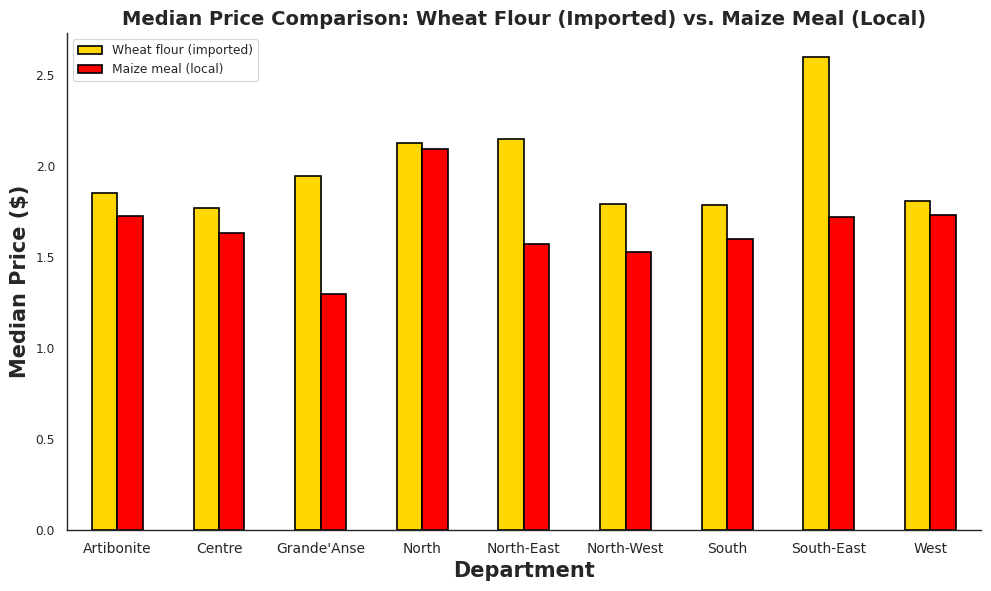

In [201]:
# Filter for two commodities (local vs imported)
commodities = ['Wheat flour (imported)', 'Maize meal (local)']
filtered_df = haiti_df[haiti_df['commodity'].isin(commodities)]

# Group and pivot to get median prices by Department
# N.B. - the unstack() is to move 'commodity' from index to columns to make the side-by-side bar with unique colors possible
# N.B. - the reindex() is to make sure the columns are present in the exact order(Wheat flour and Maize meal) to be filled with the same color.
medians = filtered_df.groupby(['Department','commodity'])['usdprice'].median().unstack()
medians = medians.reindex(columns=commodities)

# Plot the side-by-side bar
medians.plot(kind='bar', figsize=(10, 6), color=['gold','red'], edgecolor='black', linewidth=1.2)
plt.title('Median Price Comparison: Wheat Flour (Imported) vs. Maize Meal (Local)', fontsize=14, weight='bold')
plt.xlabel('Department',weight='bold', fontsize=15)
plt.ylabel('Median Price ($)',weight='bold', fontsize=15)
# Remove top and right spines on plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(commodities)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


A comparative look at maize meal (local) and wheat flour (imported) highlights a core structural pattern in Haiti's food economy: **imported commodities exhibit greater price volatility and regional disparity than their local counterparts**. For instance, wheat flour's median prices spike sharply in South-East, while maize meal shows more modest variation, with the North department as a notable outlier. These differences likely stem from supply chain complexity and *import dependency*, all of which disproportionately affect the pricing of foreign goods.

Notably, the spread here isn't as extreme as with imported wheat flour (imported), but the fact that even a domestic commodity like maize meal (local) shows regional variability is telling. The spike may be reflecting regional inflationary pressures, especially because maize meal (local) is a core staple that shows up across most market listings. **This demonstrates how imported goods are not only more expensive but also more unstable in Haiti.** However, local commodities aren't immune to price fluctuations, as shown in the North department, likely due to poor road connectivity.



---



# **Findings & Discussion**


Haiti's food price landscape reveals a system shaped by inequality, import dependence, and deep structural fragility. Prices appear cheap in the dataset, however, the brutal reality is that Haitians pay in *gourdes*, and as the gourdes depreciates, even “low” USD prices become increasingly expensive for local households. This suggests that the right‑skewed distribution doesn't just reflect a few costly imports: it also hides the growing burden of everyday staples as the exchange rate widens. What looks affordable on paper can often be unaffordable in real life, especially for families whose income doesn't keep pace with currency depreciation.

Traditional market units like marmite dominate local trade, while imported goods (often sold in standardized units) show far greater volatility. Local staples such as maize meal and rice maintain relatively stable, whereas imported wheat flour and vegetable oil exhibit wide swings driven by inflation, shipping costs, and exchange rate pressures. Regional disparities further complicate the picture: departments like Artibonite and North‑West consistently face higher median prices due to weak infrastructure and supply constraints. These gaps show how geography and market access shape everyday affordability for households. Consequently, the burden of rising prices is felt unevenly across the country, with the most isolated regions (North area) paying the highest cost.

<br></br>

### Presented by:

<a href="https://www.linkedin.com/in/carllegros/" target="_blank" style="color:blue;">Carl Legros </a>